In [36]:

import numpy as np # linear algebra
import pandas as pd # CSV file 


import os
# Import the os module to interact with the file system
import os

# os.walk('/kaggle/input') iterates over all directories and files in the '/kaggle/input' directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    # Iterate over the filenames in the current directory
    for filename in filenames:
        # Print the full path of the current file
        print(os.path.join(dirname, filename))
        # Break after the first file in each directory, to only print one file per directory
        break




/kaggle/input/wesamm/saved_model.pb
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y115.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y115.JPG


## Import Libraries

In [37]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub 

In [38]:
import os

folder_path_no = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/no"
folder_path_yes = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes"

# Use os.listdir to get a list of files in the 'no' directory
folder_no = os.listdir(folder_path_no)

# Use os.listdir to get a list of files in the 'yes' directory
folder_yes = os.listdir(folder_path_yes)

# Print the number of files in the 'no' directory
print(len(folder_no))

# Print the number of files in the 'yes' directory
print(len(folder_yes))


98
155


In [39]:
# Select and display the first four file names from the 'folder_no' list
folder_no[:4]


['34 no.jpg', 'N20.JPG', 'N1.JPG', '49 no.jpg']

## Target Labels

In [40]:
## We can consider 
   # No Tumor  >> 0
   # Yes Tumor >> 1 

no_label = [0] * len(folder_no)
yes_label = [1] * len(folder_yes)

# Concatenate the two lists (no_label and yes_label) to create a combined list of labels.
# This combined list now represents labels for the entire dataset, with 0 for 'no tumor' and 1 for 'tumor'.
labels = no_label + yes_label

# Print the total number of labels in the combined list.
print(len(labels))


253


In [41]:
# Print the first five elements of the 'labels' list
print(labels[:5])

# Print the last five elements of the 'labels' list
print(labels[-5:])


[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


## Image data preprocessing 

In [42]:
# Convert image into numpy array
# Resize image ino 224 x 224 x 3
# Image Visualization
# Scale the image array

In [43]:
#empty list to store image data
data = []

# Iterate over each image filename in the 'folder_no' list
for img in folder_no:
    # Open the image from the specified path
    image = Image.open("/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/" + img)
    # Resize the image to 224x224 pixels
    image = image.resize((224,224))
    # Convert the image to RGB format in case it's not
    image = image.convert("RGB")
    # Convert the image to a numpy array for processing
    image = np.array(image)
    # Append the processed image to the 'data' list
    data.append(image)

# Repeat the same process for each image in the 'folder_yes' list
for img in folder_yes:
    # Open the image from the specified path
    image = Image.open("/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/" + img)
    # Resize the image to 224x224 pixels
    image = image.resize((224,224))
    # Convert the image to RGB format in case it's not
    image = image.convert("RGB")
    # Convert the image to a numpy array for processing
    image = np.array(image)
    # Append the processed image to the 'data' list
    data.append(image)


In [44]:
len(data)

253

In [45]:

# check the dimensions of the processed images
data[0].shape


(224, 224, 3)

In [46]:

# Convert the list 'data', which contains processed images, into a numpy array
# This is typically done for efficient computation and to facilitate feeding the data
x = np.array(data)

# Convert the list 'labels', which contains the corresponding labels for the images, into a numpy array
# Like 'data', converting 'labels' to a numpy array 
y = np.array(labels)


In [47]:
# Access and display the first element (first image) in the numpy array 'x'
x[0]


array([[[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       ...,

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8)

In [48]:
# Display the entire numpy array 'y' which contains the labels for the dataset
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Split The data 

In [49]:


# Split the dataset into training and testing sets
# 'test_size=0.10' indicates that 10% of the data will be used for testing
# 'shuffle=True' ensures that the dataset is shuffled before splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=True)

# Print the shape of the training data (x_train), which includes all images except the 10% reserved for testing
print(x_train.shape)

# Print the shape of the test data (x_test), which includes the 10% of images reserved for testing
print(x_test.shape)

# Print the shape of the training labels (y_train), corresponding to the training data
print(y_train.shape)

# Print the shape of the test labels (y_test), corresponding to the test data
print(y_test.shape)


(227, 224, 224, 3)
(26, 224, 224, 3)
(227,)
(26,)


In [50]:
# Access and display the first element (first image) in the training data array 'x_train'
x_train[0]


array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [51]:
# Display the numpy array 'y_train' which contains the labels for the training dataset
y_train


array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1])

## Image Data Visualization

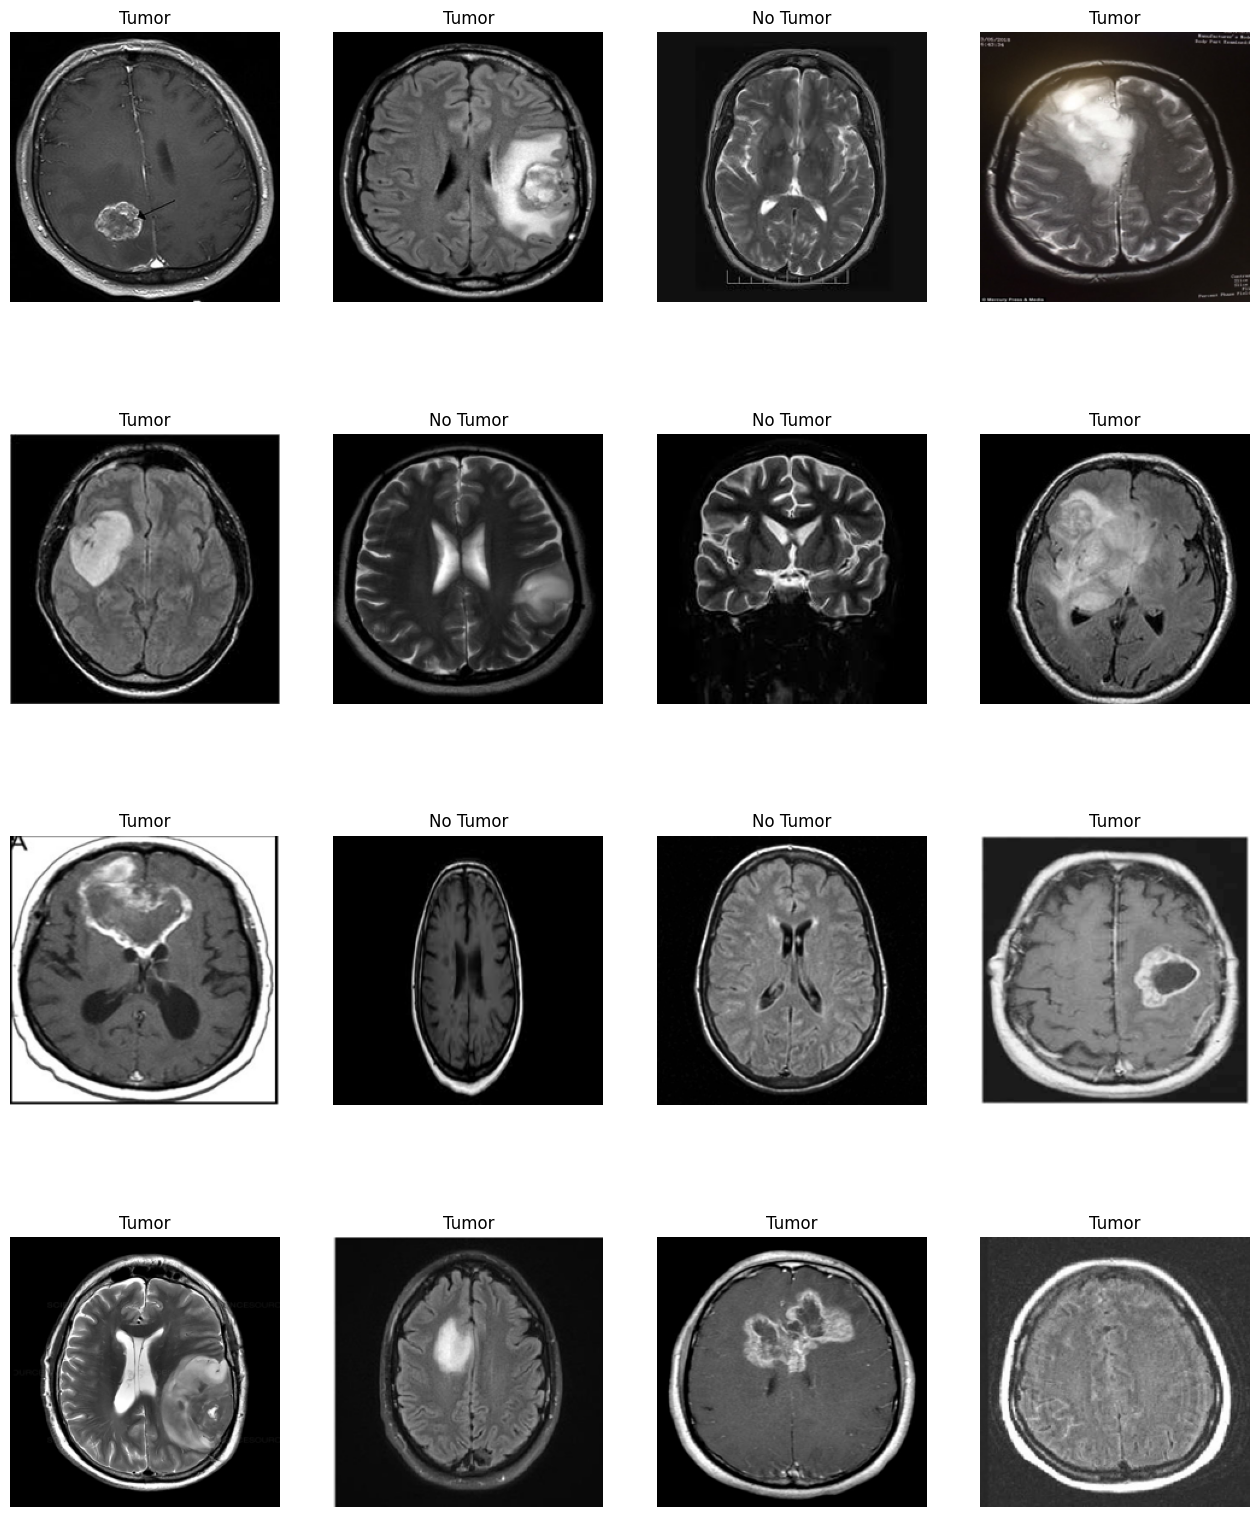

In [52]:


# Define a list of class labels corresponding to the binary classification ('No Tumor' and 'Tumor')
class_labels = ["No Tumor", "Tumor"]

# Set up a matplotlib figure with a specified size (16x20 inches)
plt.figure(figsize=(16,20))

# Loop to create subplots for the first 16 images in the training set
for i in range(16):
    # Create a subplot in a 4x4 grid at the i-th position
    plt.subplot(4, 4, i + 1)
    
    # Display the i-th image from the training set (x_train)
    plt.imshow(x_train[i])
    
    # Set the title of the subplot to the label of the i-th image from y_train, using class_labels for readability
    plt.title(f"{class_labels[y_train[i]]}")
    
    # Turn off the axis to make the image cleaner
    plt.axis("off")

# The code block is typically followed by plt.show() to display the figure when not using a Jupyter notebook


## Scale The Data

In [53]:
# Scale the training image data (x_train) by dividing each pixel value by 255
# This converts the pixel values from a range of 0-255 to a range of 0-1
x_train_scaled = x_train / 255

# Repeat the scaling process for the testing image data (x_test)
# It ensures consistency in data preprocessing between training and testing datasets
x_test_scaled = x_test / 255


## Create CNN Model

In [54]:


# Initialize a Sequential model
model = Sequential()

# Add an Input layer specifying the shape of the input (224x224 pixels with 3 color channels)
model.add(Input(shape=(224,224,3)))

# Add a Convolutional layer with 80 filters, a kernel size of 3x3, 'valid' padding, stride of 1, and ReLU activation
model.add(Conv2D(filters=80, kernel_size=(3,3), padding="valid", strides=(1,1), activation="relu"))

# Add a Max Pooling layer with a pool size of 2x2 to reduce the spatial dimensions
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolutional layer, this time with 64 filters and same other parameters
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="valid", strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Conv2D(filters=34, kernel_size=(3,3), padding="valid", strides=(1,1), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the previous layers to a one-dimensional array
model.add(Flatten())

# Add a Dense (fully connected) layer with 500 units and ReLU activation
model.add(Dense(units=500, activation='relu'))

# Add a Dropout layer with a dropout rate of 0.3 to reduce overfitting
model.add(Dropout(0.3))

# Add another Dense layer with 500 units and ReLU activation
model.add(Dense(units=500, activation='relu'))

# Add another Dropout layer with a dropout rate of 0.3
model.add(Dropout(0.3))

# Add the output Dense layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with the Adam optimizer, binary crossentropy loss function, and accuracy as the metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model's architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 80)      2240      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 80)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      46144     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_3 (Dense)             (None, 500)              

In [55]:
# Train the compiled CNN model using the scaled training data (x_train_scaled) and its labels (y_train)
# Include validation data (x_test_scaled, y_test) to evaluate the model's performance on unseen data after each epoch
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_test_scaled, y_test))  # batch_size=32


Epoch 1/10
8/8 [==============================] - 35s 4s/step - loss: 1.5802 - accuracy: 0.5859 - val_loss: 0.6174 - val_accuracy: 0.5769
Epoch 2/10
8/8 [==============================] - 33s 4s/step - loss: 0.5967 - accuracy: 0.6608 - val_loss: 0.4812 - val_accuracy: 0.8077
Epoch 3/10
8/8 [==============================] - 33s 4s/step - loss: 0.4830 - accuracy: 0.8018 - val_loss: 0.3880 - val_accuracy: 0.7692
Epoch 4/10
8/8 [==============================] - 33s 4s/step - loss: 0.3798 - accuracy: 0.8150 - val_loss: 0.2969 - val_accuracy: 0.8846
Epoch 5/10
8/8 [==============================] - 33s 4s/step - loss: 0.2773 - accuracy: 0.8943 - val_loss: 0.3105 - val_accuracy: 0.8846
Epoch 6/10
8/8 [==============================] - 33s 4s/step - loss: 0.1844 - accuracy: 0.9427 - val_loss: 0.3143 - val_accuracy: 0.9231
Epoch 7/10
8/8 [==============================] - 33s 4s/step - loss: 0.1127 - accuracy: 0.9515 - val_loss: 0.2499 - val_accuracy: 0.8846
Epoch 8/10
8/8 [==================

## Model Evaluation on test Data

In [56]:
# Evaluate the trained CNN model using the scaled test data (x_test_scaled) and its corresponding labels (y_test)
loss, acc = model.evaluate(x_test_scaled, y_test)

print("Accuracy on Test Data:", acc)


1/1 [==============================] - 1s 877ms/step - loss: 0.2678 - accuracy: 0.9231
Accuracy on Test Data: 0.9230769276618958


In [57]:
# Use the trained CNN model to make predictions on the scaled test data (x_test_scaled)
y_pred = model.predict(x_test_scaled)

# Convert the prediction probabilities into binary labels (0 or 1)
# If the predicted probability is greater than or equal to 0.5, classify as 1 (positive class); otherwise, classify as 0
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]

# Display the first six predictions from the model
# This is useful for a quick inspection of the model's predictions on test data
y_pred[:6]


1/1 [==============================] - 1s 905ms/step


[1, 1, 0, 1, 1, 1]

In [58]:
y_test[:10]   # Actual Label

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [59]:
y_pred[:10]  # Predicted Label

[1, 1, 0, 1, 1, 1, 1, 1, 0, 0]

## Evaluation Matrix

In [60]:

# Generate and print the confusion matrix for the model's predictions
# The confusion matrix compares the true labels (y_test) against the model's predictions (y_pred)
# It's a useful tool to understand the performance of a classifier, showing true positives, false positives, true negatives, and false negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()

# Generate and print the classification report
# The classification report provides key metrics such as precision, recall, f1-score for each class
# It also provides support, which is the number of occurrences of each class in y_test
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[10  1]
 [ 1 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.93      0.93      0.93        15

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



## Actual & Predicted Image 

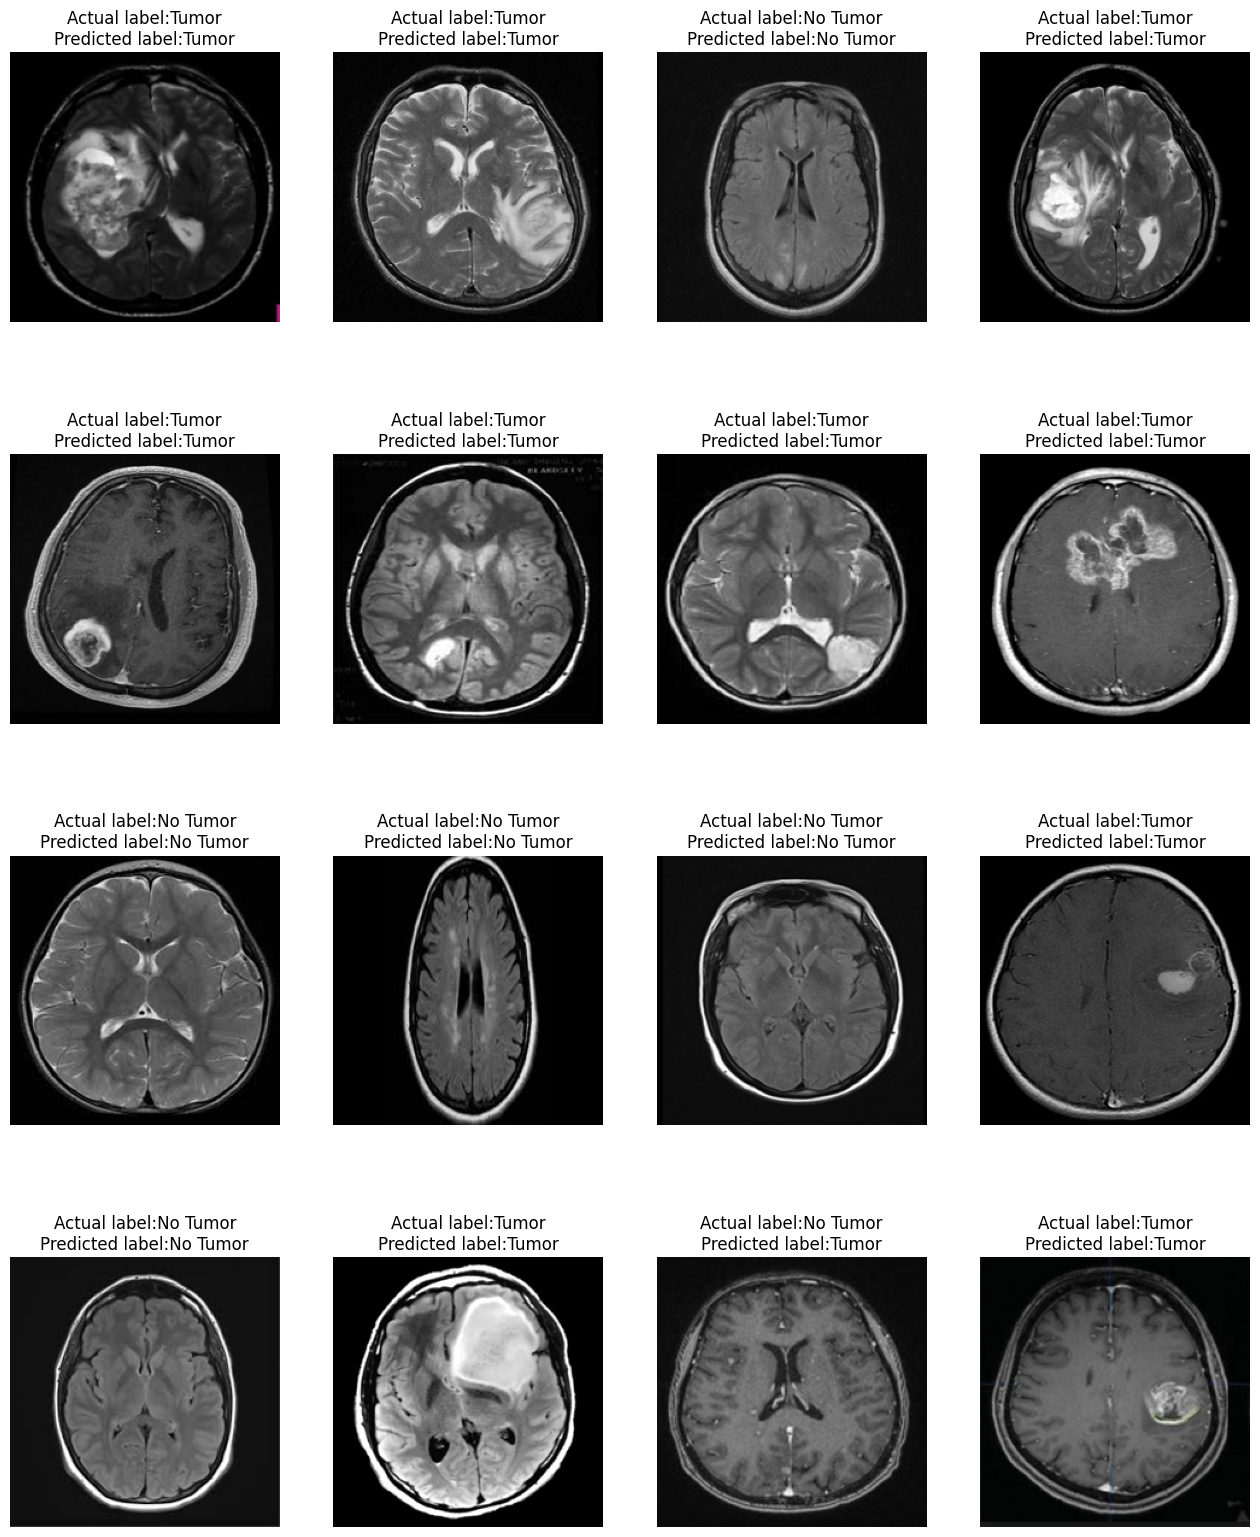

In [61]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual label:{class_labels[y_test[i]]}\nPredicted label:{class_labels[y_pred[i]]}")
    plt.axis("off")

## We see up the model has overfitting and some wrong predicte so we will use Pretrained Model for better result

In [69]:


# Specify the path to the pre-trained EfficientNet model
path = "/kaggle/input/dataaa" # Assuming this model expects input images of size 224x224x3

# Load the pre-trained EfficientNet model from TensorFlow Hub
# Set 'trainable' to False to freeze the layers of this model during training, so their weights won't be updated
efficient_model = hub.KerasLayer(path, input_shape=(224, 224, 3), trainable=False)

# Initialize a Sequential model
eff_model = Sequential()

# Add the pre-trained EfficientNet model as the first layer
eff_model.add(efficient_model)

# Add a Dense layer with one unit and a sigmoid activation function
# This is the output layer for binary classification
eff_model.add(Dense(units=1, activation="sigmoid"))

# Print the summary of the model to see its architecture and parameters
eff_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1000)              5330564   
                                                                 
 dense_7 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 5,331,565
Trainable params: 1,001
Non-trainable params: 5,330,564
_________________________________________________________________


In [63]:
# Compile the EfficientNet-based model
# Use the Adam optimizer, binary crossentropy loss (suitable for binary classification tasks), and track accuracy as a metric
eff_model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# Train the model using the scaled training data (x_train_scaled) and corresponding labels (y_train)
# Validation data (x_test_scaled, y_test) is also provided, allowing the model to be evaluated on this unseen data after each epoch
# This helps to monitor the model's performance and check for issues like overfitting
history_4 = eff_model.fit(x_train_scaled , y_train ,
           epochs=10, validation_data=(x_test_scaled,y_test))

Epoch 1/10
8/8 [==============================] - 17s 1s/step - loss: 0.6172 - accuracy: 0.6696 - val_loss: 0.5841 - val_accuracy: 0.6923
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.4627 - accuracy: 0.7621 - val_loss: 0.5180 - val_accuracy: 0.7308
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.4285 - accuracy: 0.8150 - val_loss: 0.4853 - val_accuracy: 0.8077
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.3426 - accuracy: 0.8546 - val_loss: 0.5079 - val_accuracy: 0.7692
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.3220 - accuracy: 0.8590 - val_loss: 0.4551 - val_accuracy: 0.8077
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.2823 - accuracy: 0.9119 - val_loss: 0.4618 - val_accuracy: 0.8462
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.2595 - accuracy: 0.9163 - val_loss: 0.4433 - val_accuracy: 0.8462
Epoch 8/10
8/8 [==================

In [64]:
# Evaluate the trained EfficientNet-based model on the scaled test data (x_test_scaled) and the corresponding labels (y_test)
# This method returns the loss and accuracy of the model when making predictions on the test dataset
loss, acc = eff_model.evaluate(x_test_scaled, y_test)

# This metric is important to understand how well the model performs on new, unseen data
print("Accuracy on Test Data:", acc)


1/1 [==============================] - 1s 1s/step - loss: 0.3980 - accuracy: 0.8846
Accuracy on Test Data: 0.8846153616905212


In [65]:
# Use the trained EfficientNet-based model to make predictions on the scaled test data (x_test_scaled)
# The 'predict' method outputs the predicted probabilities of the positive class for each test sample
y_pred = eff_model.predict(x_test_scaled)

# Convert the predicted probabilities into binary labels (0 or 1)
# A threshold of 0.5 is used: if the predicted probability is 0.5 or higher, classify as 1 (positive class); otherwise, classify as 0
# This thresholding step is standard in binary classification tasks
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]


1/1 [==============================] - 2s 2s/step


In [66]:


# Generate and print the confusion matrix for the EfficientNet-based model's predictions
# The confusion matrix compares the true labels (y_test) against the model's predictions (y_pred)
# It provides a detailed breakdown of the model's performance, showing true positives, false positives, true negatives, and false negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()

# Generate and print the classification report
# The classification report includes key metrics such as precision, recall, and f1-score for each class
# It also provides the overall accuracy and support (number of true instances for each label)
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 8  3]
 [ 0 15]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.83      1.00      0.91        15

    accuracy                           0.88        26
   macro avg       0.92      0.86      0.88        26
weighted avg       0.90      0.88      0.88        26



## Actual & Predicted Image on EfficientNet Model

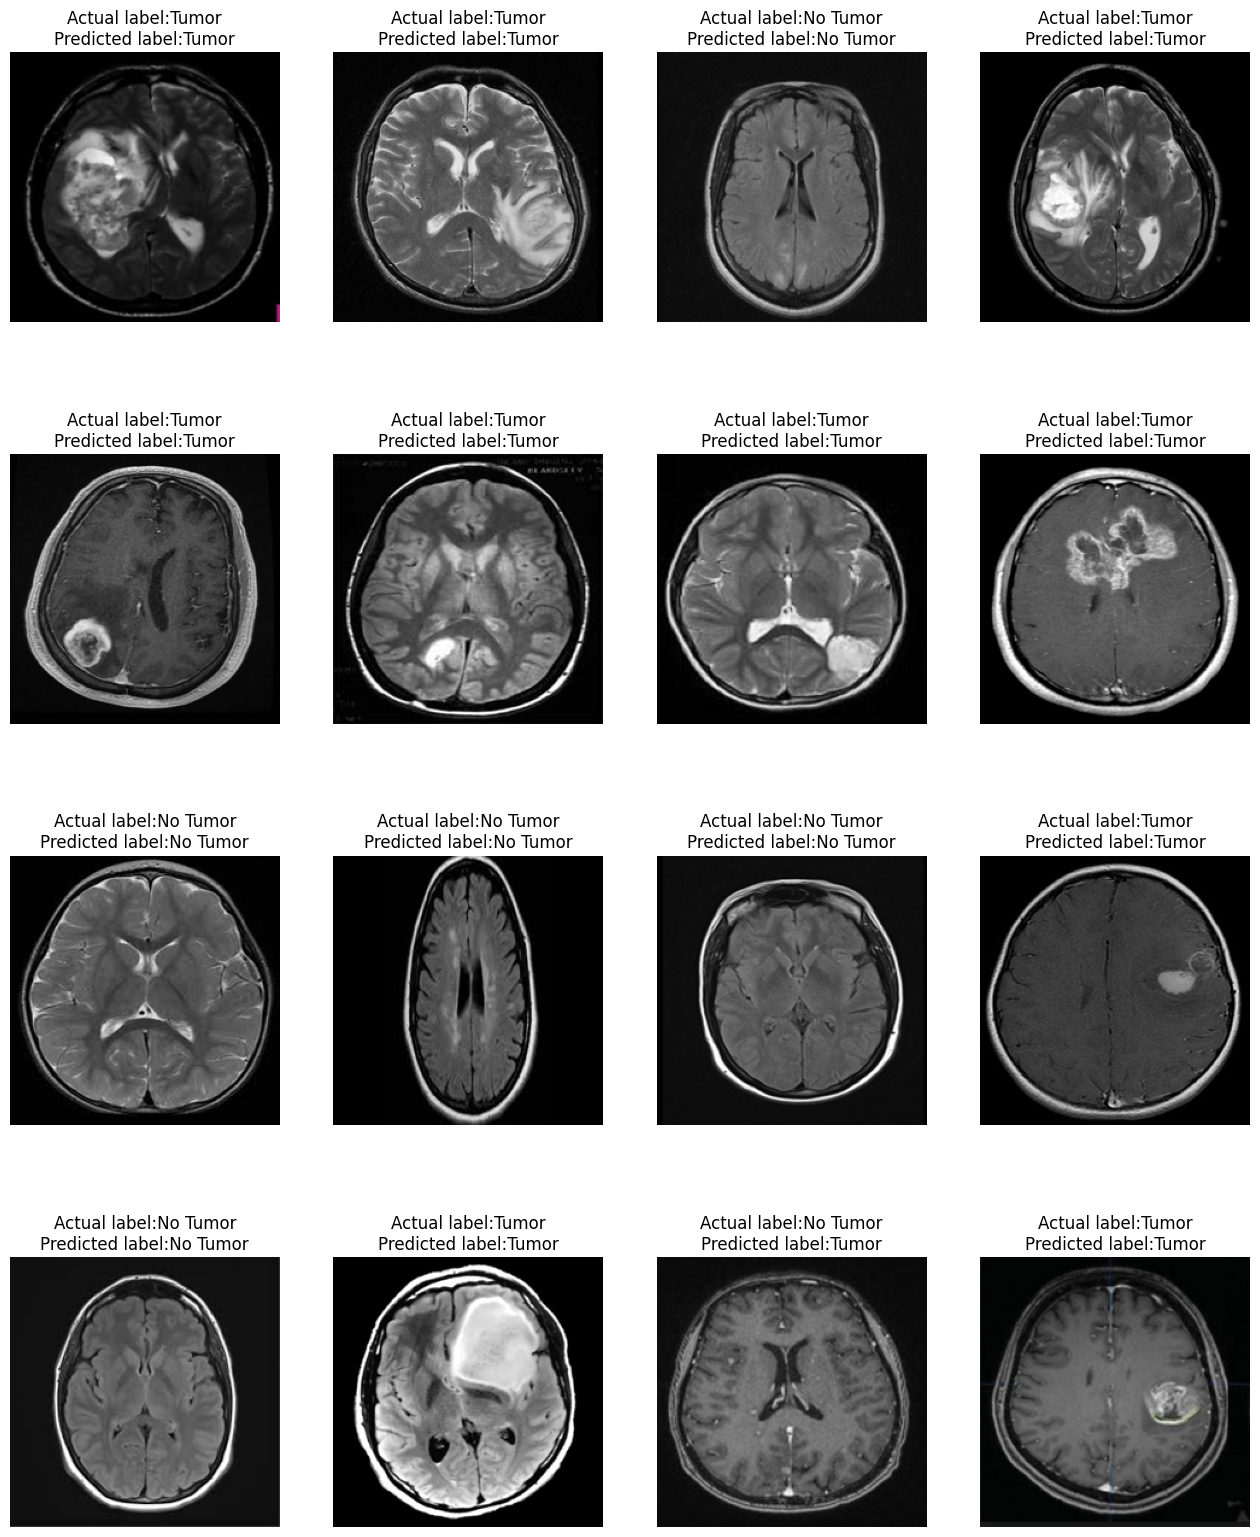

In [67]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual label:{class_labels[y_test[i]]}\nPredicted label:{class_labels[y_pred[i]]}")
    plt.axis("off")

# wesam alhalawane 2141523
# abdullah almazroye 2140525